In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [4]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

(1024, 1024, 3)
[[163.22894167 197.7378391  120.58754226]
 [107.75234566  95.61897607  71.64568262]]
[[162.72584002 200.59589652 115.71810883]
 [ 90.01030928  70.29381443  26.19587629]
 [157.59603246 143.92155095 109.4625789 ]
 ...
 [ 90.84875847  77.04514673  50.1986456 ]
 [ 91.03169014  86.54225352  68.55985915]
 [132.37068966 161.94827586  83.47413793]]


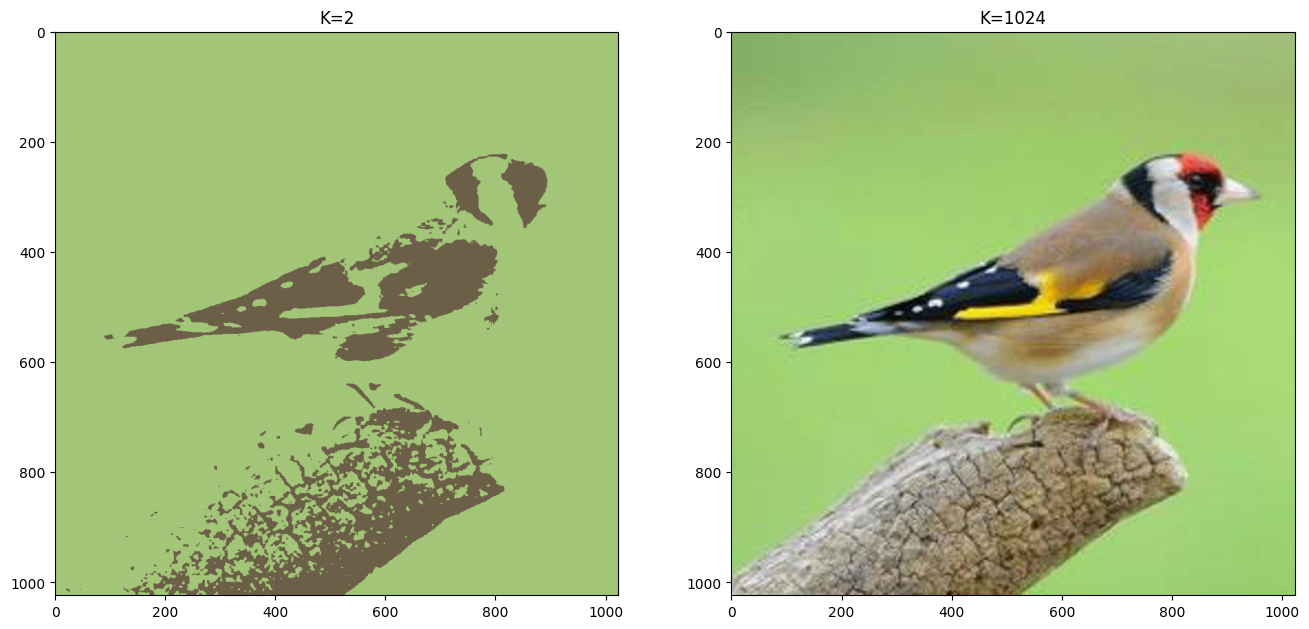

In [11]:
h,w,c = img.shape
print(img.shape)
Z = img.reshape((-1,3))
Ka = [2,1024]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label,center = km_clust(Z,K)
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)

    plt.subplot(1,len(Ka),i+1)
    plt.title("K={}".format(K))
    plt.imshow(res)

plt.show()

## 1-2. cluster with RGB values and the location

[[153.55630102 185.62538503 110.27338534 255.84054062 509.26841729]
 [157.34339341 181.19696498 117.18068794 767.81078872 513.73726799]]
[[151.91496299 194.0663223  111.30357    254.12284057 256.40487835]
 [155.64179678 177.54016154 109.37778725 257.23359242 768.20469408]
 [157.13505195 182.79748501 111.34626299 768.93603445 766.18012266]
 [157.09692788 179.26707318 122.88493587 766.4018973  254.00821041]]
[[160.63838957 186.42562345 114.96616173 511.34815721 825.05864693]
 [164.82745051 197.0324729  131.4324319  779.42282891 152.35605775]
 [157.2956952  197.91219096 110.49605214 167.92783103 493.33139725]
 [159.74018431 200.35571388 117.49300016 852.89436141 856.63062203]
 [142.8003214  136.75750619 102.74796255 862.10347966 505.57001951]
 [157.11663833 181.30492972 114.21354948 171.05206684 849.34935943]
 [155.41570904 199.64997094 114.12920695 248.63964178 149.52301606]
 [144.02488836 162.21872238 100.9878479  519.58124841 434.70892614]]
[[153.34108582 192.94734163 110.70753541 105.

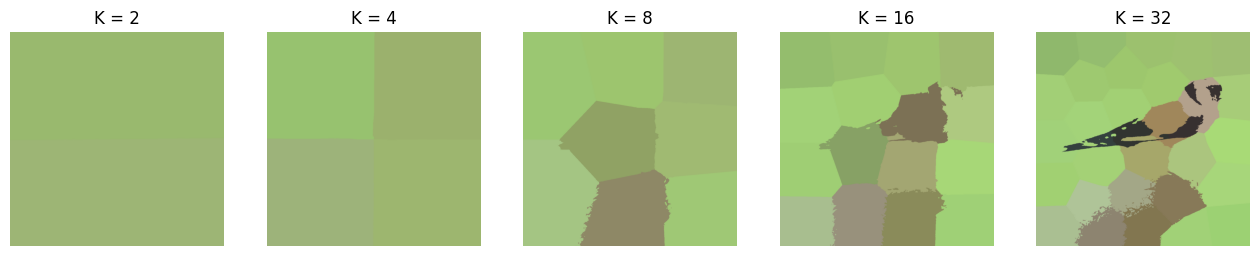

In [6]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[152.34525844 175.00530154 114.17429395 188.82184286 129.3978846 ]
 [158.82583047 192.57137677 113.23077766  61.50156144 126.21652053]]
[[157.49747639 201.38817301 114.29964339  67.10205915  58.39857318]
 [164.70513471 205.82231725 120.76774832 188.12500062 209.4157438 ]
 [156.92993957 177.35954903 109.89383895  61.08881588 188.8754976 ]
 [146.87072968 159.71837582 111.87788583 191.82966077  85.35849758]]
[[137.50526786 123.28620818  89.33302287 195.64680911 135.62111802]
 [169.83557405 188.2869853  143.80207539 214.90496157  49.90455573]
 [173.67397991 208.2866735  124.58001526 133.61640739 211.99922718]
 [164.26849477 209.65688037 119.32597584 136.57105629  57.32937688]
 [ 48.94854267  48.53603265  46.32341747 116.41773713 139.08519882]
 [153.84741996 196.24983305 111.36528522  44.42312074  63.53463902]
 [161.9262476  208.92915568 120.05292899 221.12067314 212.44607166]
 [160.04000298 185.90383971 114.00065936  46.88873158 184.46769532]]
[[167.12443539 217.23659159 117.77065396 143.

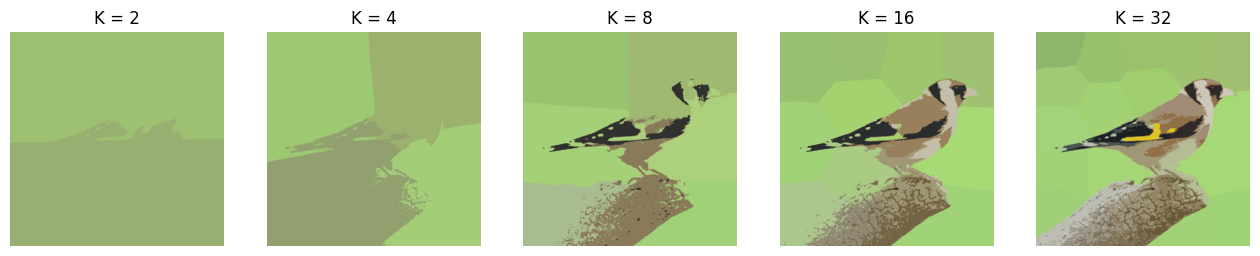

In [12]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()